#### George Kwakye

# linear Regression



## Determing how how spending on advertisements impacts sales from an advertising dataset

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [2]:
#read data from Advertising.csv file
data = pd.read_csv('Advertising.csv', index_col = 0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
#Assign column names
data.columns = ['TV','Radio','Newspaper','Sales']

In [4]:
data.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

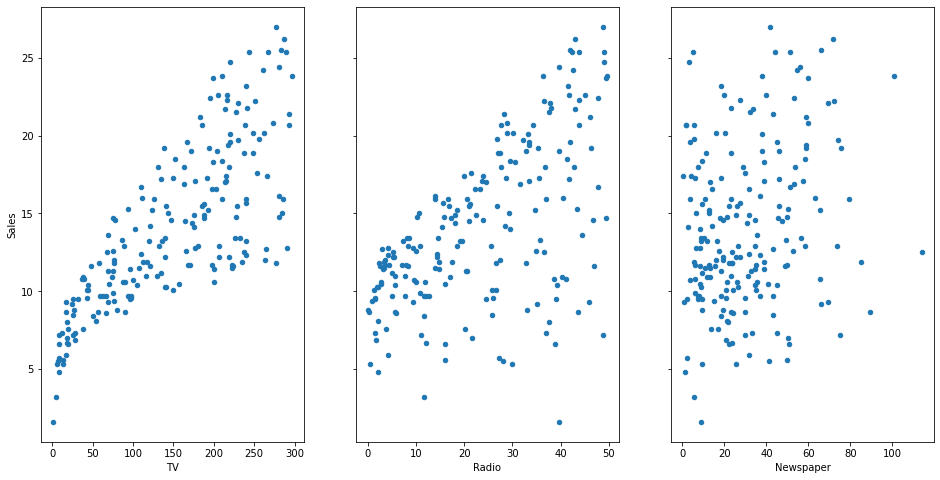

In [5]:
#Visualizing the relationship between Sales and the features
figure,ax = plt.subplots(1,3, sharey=True)
data.plot(kind='scatter',x = 'TV',y ='Sales', ax = ax[0],figsize =(16,8))
data.plot(kind='scatter',x = 'Radio',y ='Sales', ax = ax[1],figsize =(16,8))
data.plot(kind='scatter',x = 'Newspaper',y ='Sales', ax = ax[2],figsize =(16,8))

In [14]:
#Applying linear regression to determin the relationship between TV ads and sales
feature_col = ['TV']
X = data[feature_col]
Y = data.Sales

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression()

In [17]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [66]:
#evaluating the predictor values to determine if Tv ads have effect on sales
import statsmodels.formula.api as smf
lm = smf.ols(formula ='Sales ~ TV',data =data).fit()
lm.pvalues


#The output shows a relationship between TV ads and Sales

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [34]:
#predicting new values for sales using the new model
X_new = pd.DataFrame({'TV': [50]})
lm.predict(X_new)

0    9.409426
dtype: float64

In [35]:
x_new =pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})
x_new

,TV
0,0.7
1,296.4


In [36]:
predicted_sales = lm.predict(x_new)
predicted_sales

0     7.065869
1    21.122454
dtype: float64

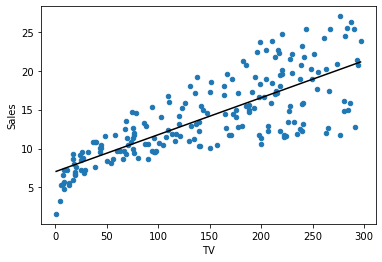

In [37]:
data.plot(kind ='scatter',x = 'TV', y = 'Sales')
plt.plot(x_new,predicted_sales, c ='black')

In [39]:
#Determining how well the model fits the data using rsquared error
lm.rsquared

0.611875050850071

## Multiple linear regression
#### Including all features

In [41]:
feature_cols =['TV','Radio','Newspaper']
X = data[feature_cols]
Y = data.Sales
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,Y,test_size = 0.3,random_state =42)

In [48]:
lm =LinearRegression()
lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [53]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

print(lm.intercept_)
print(lm.coef_)

2.70894909251591
[0.04405928 0.1992875  0.00688245]


In [55]:
predictions  = lm.predict(xtest)
predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [61]:
#determing performance of the model

performance = sqrt(mean_squared_error(ytest,predictions))
print(performance)


1.9485372043446387


In [63]:
#determing performance of the model
lm = smf.ols(formula = 'Sales~ TV + Radio + Newspaper',data =data).fit()
lm.summary()

#The higher rsquared value indicate a better fit to the data than the previous model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        11:18:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""